In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Aquí tenemos las siguientes características:
1. CustomerID: Es la identificación única otorgada a un cliente
2. Génder: Género del cliente
3. Age: La edad del cliente
4. Annual Income(k$): Es el ingreso anual del cliente
5. Spending Score: Es el puntaje (sobre 100) que las autoridades del centro comercial otorgan a un cliente, en función del dinero gastado y el comportamiento del cliente.

In [ ]:
from pandas import get_dummies
df = pd.get_dummies(df)
df = df.drop(columns='Gender_Female')
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [ ]:
X=df.iloc[:, [2,3]].values

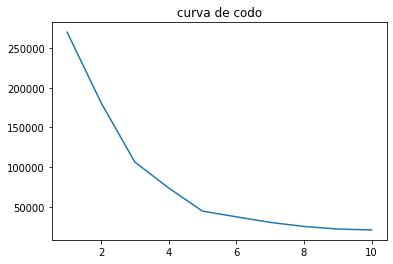

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('curva de codo')
plt.show() 

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

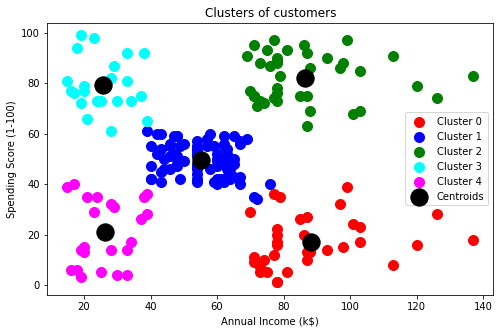

In [ ]:
#Visualizing all the clusters 
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
X=df.iloc[:, [4,2,3]].values
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


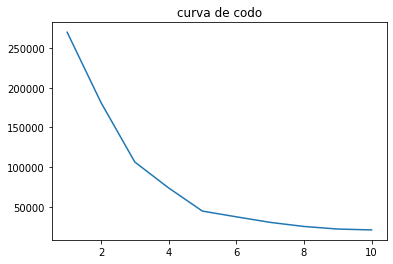

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('curva de codo')
plt.show() 

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

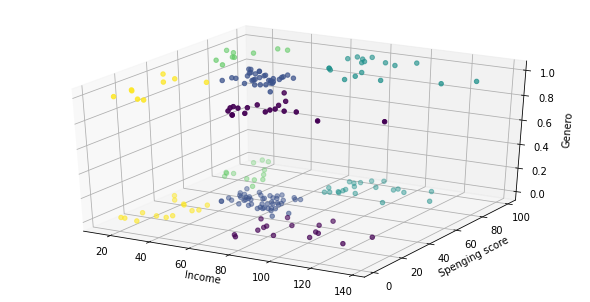

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(8,4))
plt.clf()
ax = Axes3D(fig)

plt.cla()
ax.set_xlabel('Income')
ax.set_ylabel('Spenging score')
ax.set_zlabel('Genero')
ax.scatter( X[:,1], X[:,2], X[:,0],c=y_kmeans)

In [ ]:
df['labels'] = y_kmeans

In [ ]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,labels
0,1,19,15,39,1,4
1,2,21,15,81,1,3
2,3,20,16,6,0,4
3,4,23,16,77,0,3
4,5,31,17,40,0,4
...,...,...,...,...,...,...
195,196,35,120,79,0,2
196,197,45,126,28,0,0
197,198,32,126,74,1,2
198,199,32,137,18,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['labels']
x = df.iloc[:,[1,2,3,4]].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNN.predict(X_test) 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.85      1.00      0.92        11
           2       1.00      1.00      1.00        10
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         6

    accuracy                           0.95        40
   macro avg       0.97      0.93      0.95        40
weighted avg       0.96      0.95      0.95        40



In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 7,  1,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  1,  0,  4,  0],
       [ 0,  0,  0,  0,  6]])

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree.predict(X_test) 

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.83      0.91      0.87        11
           2       0.91      1.00      0.95        10
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         6

    accuracy                           0.93        40
   macro avg       0.95      0.92      0.93        40
weighted avg       0.93      0.93      0.93        40



In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 7,  1,  0,  0,  0],
       [ 0, 10,  1,  0,  0],
       [ 0,  0, 10,  0,  0],
       [ 0,  1,  0,  4,  0],
       [ 0,  0,  0,  0,  6]])